In [94]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [78]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 10000
mount_test_throttle = 35
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [79]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 313,1157,1171,13.986000,10.240000,0.145400,-0.208650,0.010169,-0.000003

Rx: 4175,0,0,13.965000,10.240000,0.101780,-0.208650,0.010169,0.000000

Rx: 8170,0,0,14.007000,10.240000,0.218100,-0.208650,0.010169,0.000000

Rx: 12176,0,0,13.986000,10.240000,0.189020,-0.222560,0.010169,0.000000

Rx: 16170,0,0,14.007000,10.240000,0.290800,-0.208650,0.010169,-0.000003

Rx: 20176,0,0,13.986000,10.240000,0.218100,-0.180830,0.010169,0.000000

Rx: 24170,0,0,13.965000,10.2400

In [80]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = [30, 40, 50, 60, 70, 80]

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None)])

In [81]:
test_directory = Path("../test_data/static_thrust_validation_data/")

In [95]:
data_dict = {}
# data_dict["test_static_thrust_30pct"] = test_run(
#     filename=test_directory / "test_static_thrust_30pct.csv", plan=plan
# )
# data_dict["test_static_thrust_sweep_0"] = test_run(
#     filename=test_directory / "test_static_thrust_sweep_nudged.csv", plan=plan
# )
data_dict["test_static_thrust_sweep_10s_steps"] = test_run(
    filename=test_directory / "test_static_thrust_sweep_10s.csv", plan=plan
)
data_dict["test_static_thrust_sweep_10s_steps_0"] = test_run(
    filename=test_directory / "test_static_thrust_sweep_10s_0.csv", plan=plan
)
# data_dict["test_static_thrust_30_throttle"] = test_run(
#     filename=test_directory / "test_static_thrust_30_throttle.csv", plan=plan
# )
# data_dict["test_static_thrust_50_throttle"] = test_run(
#     filename=test_directory / "test_static_thrust_50_throttle.csv", plan=plan
# )

Loading saved data
Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: Invalid command: ,23,0,0

Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 341,1471,1442,13.902000,10.240000,0.087240,-0.180830,0.000820,-0.691647

Rx: 4172,0,0,13.902000,10.240000,0.203560,-0.194740,0.000820,-0.000003

Rx: 8170,0,0,13.902000,10.240000,0.218100,-0.180830,0.000820,0.000000

Rx: 12173,0,0,13.923000,10.240000,0.218100,-0.180830,0.000820,0.000000

Rx: 16174,0,0,14.028000,10.240000,0.189020,-0.208650,0.000820,0.000000

Rx: 20173,0,0,13.944000,10.240000,0.130860,-0.013910,0.0008

In [96]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])

In [97]:
df_all

top_motor_rpm  \
test_name                            time_ms                    
test_static_thrust_sweep_10s_steps   0.485                0.0   
                                     5.162                0.0   
                                     9.165                0.0   
                                     13.161               0.0   
                                     17.165               0.0   
...                                                       ...   
test_static_thrust_sweep_10s_steps_0 61568.170         1242.0   
                                     61572.170         1200.0   
                                     61576.170         1171.0   
                                     61580.166         1128.0   
                                     61584.164         1100.0   

                                                bottom_motor_rpm  \
test_name                            time_ms                       
test_static_thrust_sweep_10s_steps   0.485                   0.0   
                                     5.162                   0.0   
                                     9.165                   0.0   
                                     13.161                  0.0   
                                     17.165                  0.0   
...                                                          ...   
test_static_thrust_sweep_10s_steps_0 61568.170            1242.0   
                                     61572.170            1214.0   
                                     61576.170            1128.0   
                                     61580.166            1142.0   
                                     61584.164            1057.0   

                                                batt_voltage_V  \
test_name                            time_ms                     
test_static_thrust_sweep_10s_steps   0.485              15.225   
                                     5.162              14.427   
                                     9.165              14.154   
                                     13.161             14.070   
                                     17.165             14.028   
...                                                        ...   
test_static_thrust_sweep_10s_steps_0 61568.170          12.852   
                                     61572.170          12.852   
                                     61576.170          12.810   
                                     61580.166          12.852   
                                     61584.164          12.852   

                                                batt_current_A  top_current_A  \
test_name                            time_ms                                    
test_static_thrust_sweep_10s_steps   0.485               10.24        0.18902   
                                     5.162               10.24        0.24718   
                                     9.165               10.24        0.17448   
                                     13.161              10.24        0.27626   
                                     17.165              10.24        0.31988   
...                                                        ...            ...   
test_static_thrust_sweep_10s_steps_0 61568.170           10.24        0.23264   
                                     61572.170           10.24        0.10178   
                                     61576.170           10.24        0.14540   
                                     61580.166           10.24        0.20356   
                                     61584.164           10.24        0.13086   

                                                bottom_current_A  thrust_N  \
test_name                            time_ms                                 
test_static_thrust_sweep_10s_steps   0.485              -0.13910 -0.001093   
                                     5.162              -0.06955 -0.001093   
                                     9.165              -0.20865 -0.001093   
              

In [102]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                                       mean         std   
test_name                            throttle                             
test_static_thrust_sweep_10s_steps   30           6674.8230   48.786686   
                                     40           8420.0405   94.968170   
                                     50           9600.1920  171.652872   
                                     60          10762.1755  147.751535   
                                     70          11875.3245  281.634036   
                                     80          13069.1325  118.852168   
test_static_thrust_sweep_10s_steps_0 30           6661.3480   49.094776   
                                     40           8416.4460   95.530179   
                                     50           9750.2415  133.353218   
                                     60          11129.3390  170.348374   
                                     70          12177.4475  111.976670   
                                     80          13206.0130  124.489749   

                                              bottom_motor_rpm              \
                                                          mean         std   
test_name                            throttle                                
test_static_thrust_sweep_10s_steps   30              6825.2585   46.629871   
                                     40              8646.8200   87.530197   
                                     50              9933.6905  172.569835   
                                     60             11092.9125  152.677477   
                                     70             12306.1030   93.601907   
                                     80             13518.5710  437.457843   
test_static_thrust_sweep_10s_steps_0 30              6795.6850   47.189270   
                                     40              8671.5340   84.583172   
                                     50             10081.9035  139.901474   
                                     60             11419.1580   96.195779   
                                     70             12611.6905  104.781550   
                                     80             13737.8035  327.636238   

                                              batt_voltage_V            \
                                                        mean       std   
test_name                            throttle                            
test_static_thrust_sweep_10s_steps   30            13.755798  0.006889   
                                     40            13.551920  0.022681   
                                     50            12.925332  0.194992   
                                     60            12.286103  0.061863   
                                     70            11.962251  0.030525   
                                     80            11.535615  0.030242   
test_static_thrust_sweep_10s_steps_0 30            13.754034  0.010331   
                                     40            13.604283  0.033554   
                                     50            13.154410  0.096412   
                                     60            12.674487  0.051129   
                                     70            12.245111  0.058902   
                                     80            11.782890  0.079078   

                                              batt_current_A            \
                                                        mean       std   
test_name                            throttle                            
test_static_thrust_sweep_10s_steps   30             10.24000  0.000000   
                                     40             10.24000  0.000000   
                                     50             10.32520  0.254317   
                                     60             13.07848  0.998330   
                                     70             17.72604  0.997867   
                                     80       

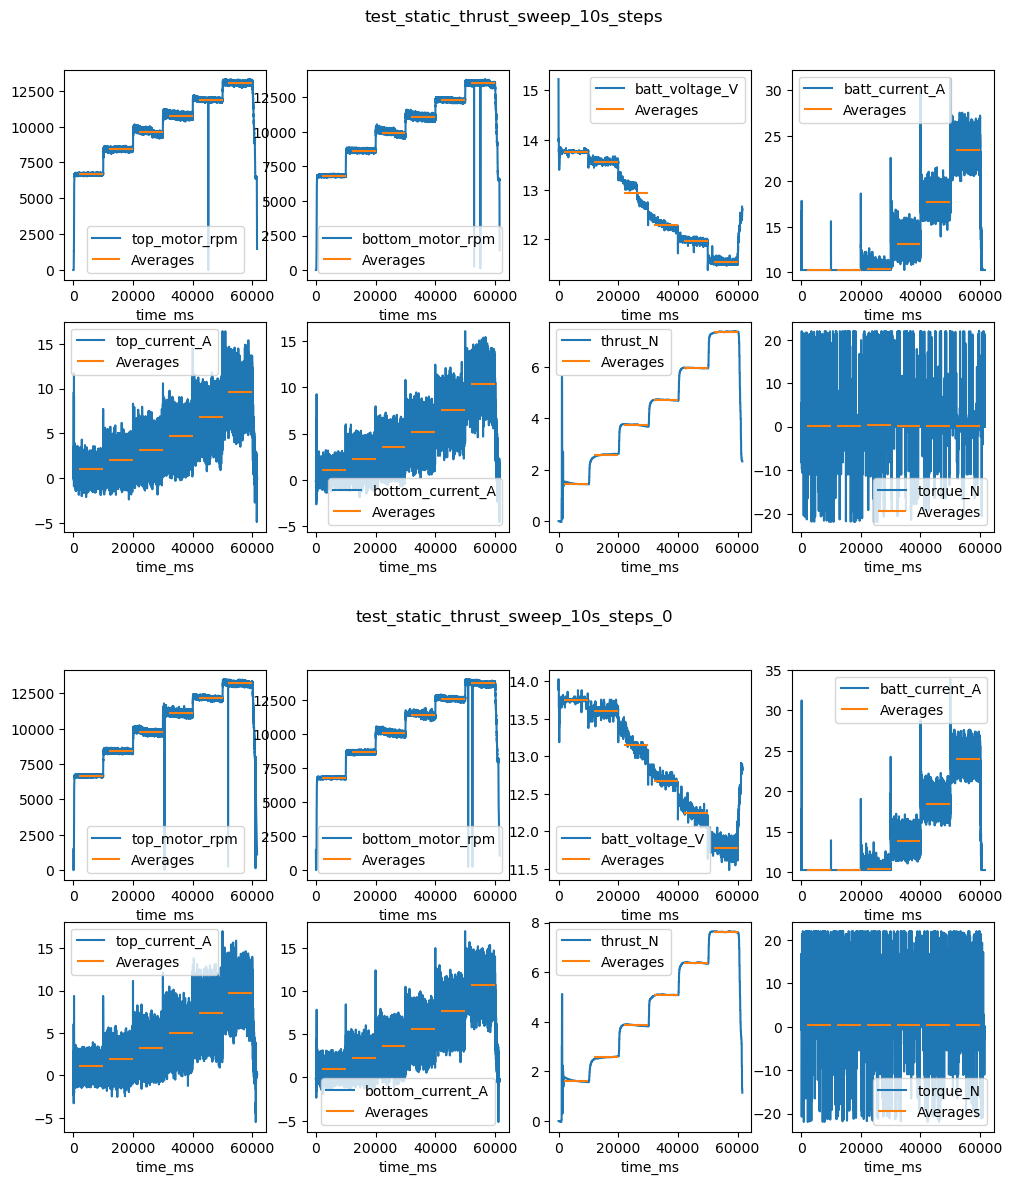

In [103]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

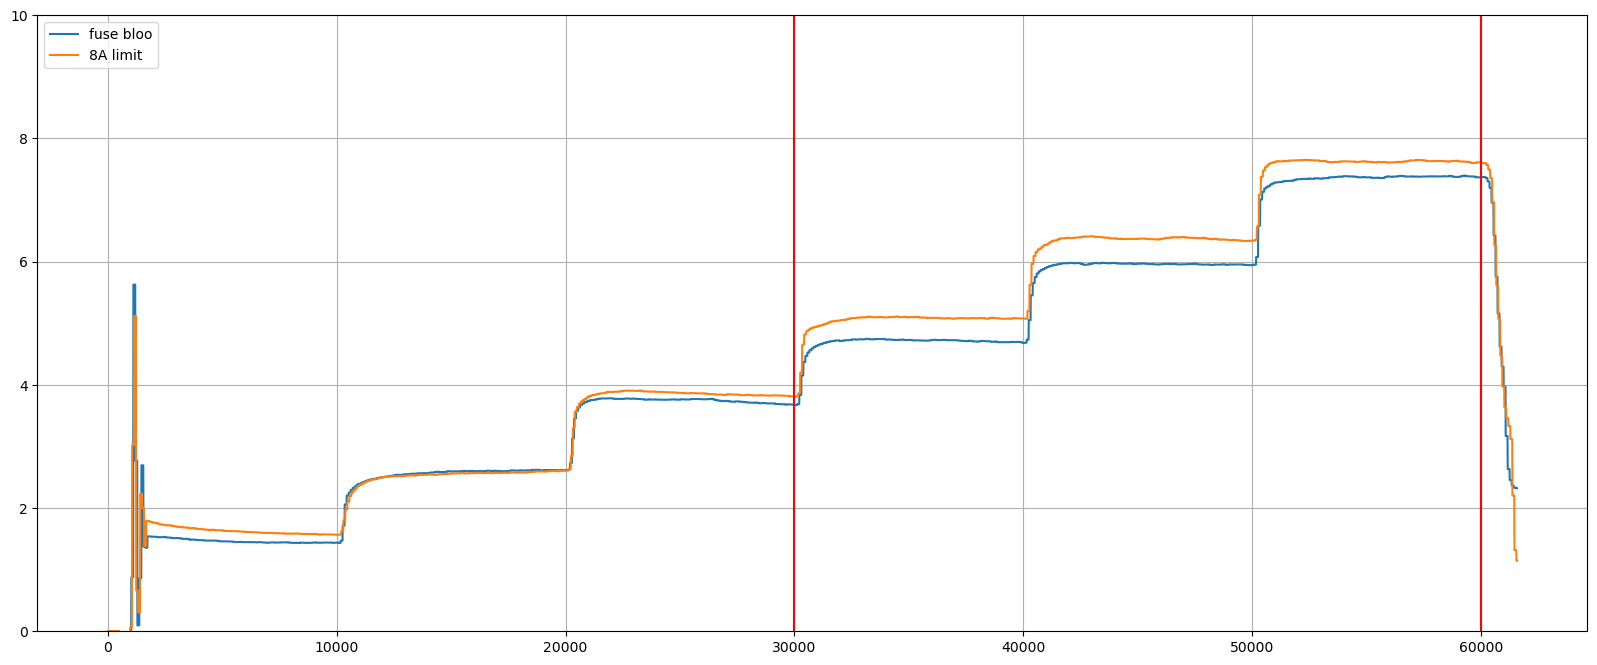

In [106]:
plt.figure(figsize=(20, 8))
plt.plot(df_all.loc['test_static_thrust_sweep_10s_steps']['thrust_N'], label='fuse bloo')
plt.plot(df_all.loc['test_static_thrust_sweep_10s_steps_0']['thrust_N'], label='8A limit')
plt.axvline(30_000, color='r')
plt.axvline(60_000, color='r')
plt.grid()
plt.ylim(0, 10)
plt.legend()

In [ ]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

could not open port 'COM9': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)
